# Generate Bathymetry and Current Data for Analytical Comparisons

This notebook generates current and bathymetry arrays that are used to run `snells_law_verification.ipynb`. Files are saved in netcdf3 classic format to the forcing subdirectory.

## General Setup

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
NX = 300
NY = 150
dl = 50
xs = np.arange(0, NX*dl, dl, dtype=np.float64)
ys = np.arange(0, NY*dl, dl, dtype=np.float64)
base_array = np.ones((NY, NX), dtype=np.float64)

## Step Bathymetry

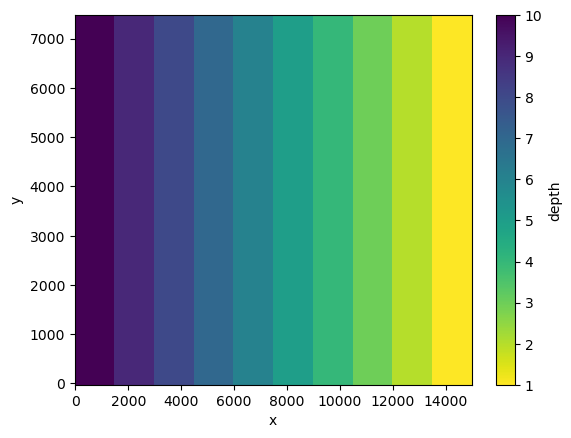

In [3]:
n_shelfs = 10
depth_max = 10
d_depth = 1

# Create descending order 1D array of depths for each x coordinate
depths_x = depth_max - np.floor(np.linspace(0, n_shelfs, NX, endpoint=False))*d_depth

step_bathymetry_array = depths_x * base_array
step_bathymetry_ds = xr.Dataset(data_vars={'depth': (('y', 'x'), step_bathymetry_array)},
                           coords={'x': ('x', xs), 'y': ('y', ys)})
# Plot bathymetry to double check
step_bathymetry_ds.depth.plot(cmap='viridis_r')

In [4]:
# Save step bathymetry array to file
step_bathymetry_ds.to_netcdf('forcing/step_bathymetry.nc', format='NETCDF3_CLASSIC')

## Null Current Field

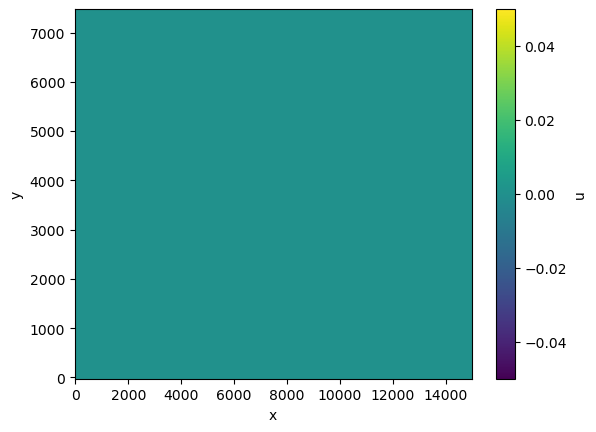

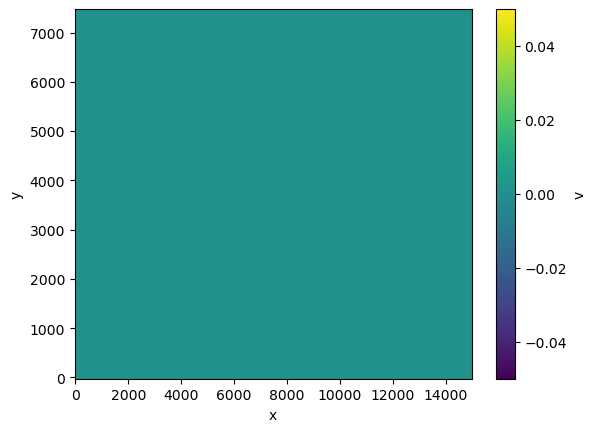

In [5]:
u_array = base_array*0
v_array = base_array*0

null_current_ds = xr.Dataset(data_vars={'u': (('y', 'x'), u_array), 'v': (('y', 'x'), v_array)},
                             coords={'x': ('x', xs), 'y': ('y', ys)})

# Plot currents to double check
null_current_ds.u.plot()
plt.show()
null_current_ds.v.plot()
plt.show()

In [6]:
# Save null current dataset to file
null_current_ds.to_netcdf('forcing/null_current.nc', format='NETCDF3_CLASSIC')

## Flat Deep Water Bathymetry

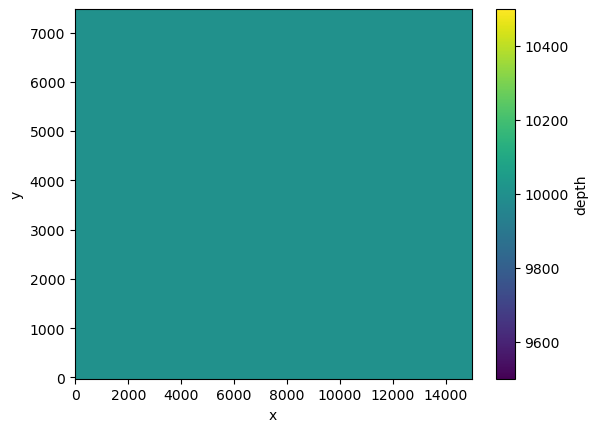

In [7]:
flat_depth = 10_000 # Sufficiently Deep no wave should feel the bottom
flat_bathymetry_array = flat_depth * base_array
flat_bathymetry_ds = xr.Dataset(data_vars={'depth': (('y', 'x'), flat_bathymetry_array)},
                           coords={'x': ('x', xs), 'y': ('y', ys)})

# Plot Bathymetry to double check
flat_bathymetry_ds.depth.plot()

In [8]:
# Save flat deep-water bathymetry dataset to file
flat_bathymetry_ds.to_netcdf('forcing/deep_water_flat_bathymetry.nc', format='NETCDF3_CLASSIC')

## Shear Currents

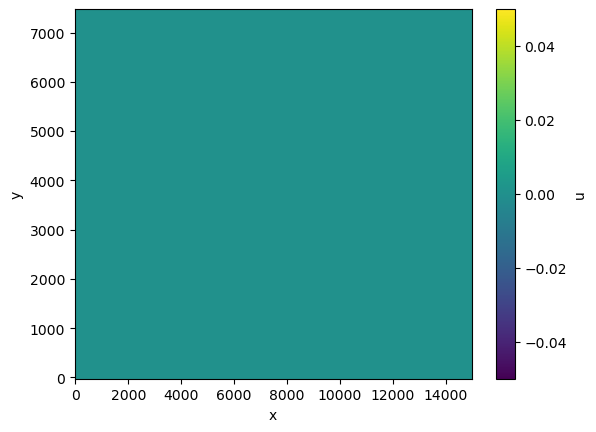

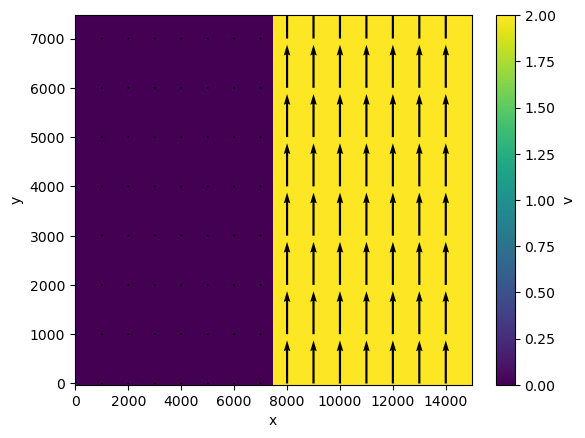

In [9]:
U = 0
V = 2

u_array = base_array*U
v_array = base_array*0
v_array[:, NX//2:] = V

shear_current_ds = xr.Dataset(data_vars={'u': (('y', 'x'), u_array), 'v': (('y', 'x'), v_array)},
                           coords={'x': ('x', xs), 'y': ('y', ys)})

# Plot currents to double check
shear_current_ds.u.plot()
plt.show()
spaced_shear_current_ds = shear_current_ds.sel(x=slice(None,None,20), y=slice(None,None,20))
fig, ax = plt.subplots()
shear_current_ds.v.plot(ax=ax)
ax.quiver(spaced_shear_current_ds.x, spaced_shear_current_ds.y, spaced_shear_current_ds.u, spaced_shear_current_ds.v)

In [10]:
# Save shear current dataset to file
shear_current_ds.to_netcdf('forcing/shear_current_2v.nc', format='NETCDF3_CLASSIC')